# 1.0 Import Libraries

In [146]:

import pandas as pd
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import numpy as np
import statistics
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()
plt.style.use("dark_background")
import math

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.59)


# 2.0 Input Stock Code

In [147]:
code="KO"#@param {type: "string"}
code=code.upper()
code=code.replace('"',"")

# 3.0 Import Historical Earnings Dates

In [148]:
url=f"https://finance.yahoo.com/calendar/earnings?symbol={code}"
data=pd.read_html(url)
data=data[0]
earnings_dates=data["Earnings Date"]# temque filtrar p corresponder a data de inicio
data=data["Earnings Date"].str.rsplit(",",n=5,expand=True)
x=data[2].str.rsplit(" ",n=5,expand=True)
y=data[0].str.rsplit(" ",n=5,expand=True)
dados=pd.DataFrame()
dados["Day"]=y[1]
lista=[]
aux=[]
for a in range(len(data[0])):
  aux.append(y[0][a])
  if aux[a]=="Jan":
    lista.append(1)
  if aux[a]=="Feb":
    lista.append(2)
  if aux[a]=="Mar":
    lista.append(3)
  if aux[a]=="Apr":
    lista.append(4)
  if aux[a]=="May":
    lista.append(5)
  if aux[a]=="Jun":
    lista.append(6)
  if aux[a]=="Jul":
    lista.append(7)
  if aux[a]=="Aug":
    lista.append(8)
  if aux[a]=="Sep":
    lista.append(9)
  if aux[a]=="Oct":
    lista.append(10)
  if aux[a]=="Nov":
    lista.append(11)
  if aux[a]=="Dec":
    lista.append(12)
dataframee=pd.DataFrame(lista)
dados["Month"]=dataframee
dados["Year"]=data[1]
dados["Momento"]=x[2]
dados["Dates"]=dados["Year"]+"-"+dados["Month"].astype(str)+"-"+dados["Day"]

dados = dados.values[::-1]# reversing the string
dados=pd.DataFrame(dados)
dados=dados.rename(columns={0:"Day",1:"Month",2:"Year",3:"Momento",4:"Data Write"})
ultimo_ano=int(dados["Year"][0])# pegando os primeiros valores 
ultimo_mes=int(dados["Month"][0])
ultimo_dia=int(dados["Day"][0])
dados

,Day,Month,Year,Momento,Data Write
0,17,7,1997,AMEDT,1997-7-17
1,16,10,1997,AMEDT,1997-10-16
2,28,1,1998,AMEDT,1998-1-28
3,15,4,1998,AMEDT,1998-4-15
4,16,7,1998,AMEDT,1998-7-16
...,...,...,...,...,...
95,19,4,2021,AMEDT,2021-4-19
96,21,7,2021,AMEDT,2021-7-21
97,20,10,2021,AMEDT,2021-10-20
98,08,2,2022,AMEDT,2022-2-08


#4.0 Import Prices Daily & Plot Daily Returns

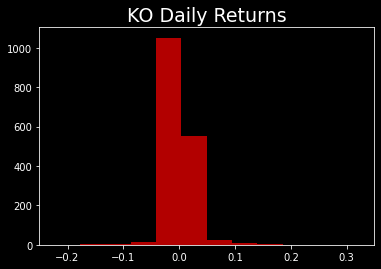

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns
Date,,,,,,,,
1997-07-15,18.964775,19.083730,18.828827,19.066736,5041400,0.0,0.0,NaN
1997-07-16,19.066746,19.440603,19.049752,19.270668,5546200,0.0,0.0,0.010696
1997-07-17,19.270662,19.559552,18.777850,18.998766,7063600,0.0,0.0,-0.014110
1997-07-18,18.981767,18.981767,18.777844,18.828825,9139600,0.0,0.0,-0.008945
1997-07-21,18.726869,18.726869,18.420985,18.573927,6144800,0.0,0.0,-0.013538
...,...,...,...,...,...,...,...,...
2020-12-24,52.189092,52.710785,52.189092,52.602509,3265500,0.0,0.0,0.006782
2020-12-28,53.006083,53.586837,52.887964,53.311226,9020500,0.0,0.0,0.013473
2020-12-29,53.596681,53.636055,53.173420,53.281696,8320600,0.0,0.0,-0.000554


In [149]:

ticker=yf.Ticker(code)
prices=ticker.history(period="max")
prices
prices=prices[(prices.index.year>=ultimo_ano)&(prices.index.month>=ultimo_mes)&(prices.index.day>=ultimo_dia-2)]
prices["Daily Returns"]=prices["Close"].pct_change()
plt.hist(prices["Daily Returns"],bins=12,facecolor="red",alpha=0.7)
plt.title(f"{code} Daily Returns",fontsize=19)
plt.show()
prices


# 5.0 Creating Earnings Daily Returns DataFrame

In [150]:
lista_earnings=[]
dados["Year"][0]

for b in range(len(dados["Year"])):
  for c in range(len(prices["Close"])):
    if int(dados["Year"][b])==prices.index.year[c] and int(dados["Month"][b])==prices.index.month[c] and int(dados["Day"][b])==prices.index.day[c]:
      if dados["Momento"][b]=="AMEDT":
        lista_earnings.append((prices["Close"][c]-prices["Close"][c-1])/prices["Close"][c-1])
      if dados["Momento"][b]=="PMEDT":
        lista_earnings.append((prices["Close"][c+1]-prices["Close"][c])/prices["Close"][c])
earnings=pd.DataFrame(lista_earnings)
earnings=earnings.rename(columns={0:"Daily Returns"})
earnings


,Daily Returns
0,-0.014110
1,-0.014629
2,-0.007118
3,0.171366
4,-0.040017
5,0.029621
6,0.039743
7,-0.040482
8,-0.019308
9,0.041554


# 6.0 Setting Log Returns on Earnings & Prices DataFrame

In [151]:
prices["Log Returns"]=np.log(1+prices["Daily Returns"])
earnings["Log Returns"]=np.log(1+earnings["Daily Returns"])
prices.dropna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns,Log Returns
Date,,,,,,,,,
1997-07-16,19.066746,19.440603,19.049752,19.270668,5546200,0.0,0.0,0.010696,0.010639
1997-07-17,19.270662,19.559552,18.777850,18.998766,7063600,0.0,0.0,-0.014110,-0.014210
1997-07-18,18.981767,18.981767,18.777844,18.828825,9139600,0.0,0.0,-0.008945,-0.008985
1997-07-21,18.726869,18.726869,18.420985,18.573927,6144800,0.0,0.0,-0.013538,-0.013630
1997-07-22,18.709872,19.100723,18.709872,19.066736,8252800,0.0,0.0,0.026532,0.026186
...,...,...,...,...,...,...,...,...,...
2020-12-24,52.189092,52.710785,52.189092,52.602509,3265500,0.0,0.0,0.006782,0.006759
2020-12-28,53.006083,53.586837,52.887964,53.311226,9020500,0.0,0.0,0.013473,0.013383
2020-12-29,53.596681,53.636055,53.173420,53.281696,8320600,0.0,0.0,-0.000554,-0.000554


# 7.0 Setting RMS on Earnings & Prices DataFrame

In [152]:
prices["RMS"]=prices["Log Returns"]**2
earnings["RMS"]=(earnings["Log Returns"]**2)
prices=prices.dropna()

# 8.0 Calculating Weights

In [153]:
Weight_Earnings=len(earnings["Log Returns"])/(len(earnings["Log Returns"])+len(prices["Log Returns"]))
Weight_Normal=1-Weight_Earnings

# 9.0 Anualized Earnings & Normal Volatility

In [154]:
media_prices=statistics.mean(prices["RMS"])
media_earnings=statistics.mean(earnings["RMS"])
last_step_prices=math.sqrt(media_prices)
last_step_earnings=math.sqrt(media_earnings)
anualizado_prices=last_step_prices*(252/1)**0.5
anualizado_earnings=last_step_earnings*(252/1)**0.5
anualizado_prices=round(anualizado_prices,2)
anualizado_earnings=round(anualizado_earnings,2)
print(f"Normal Volatility: {anualizado_prices*100}%")
print(f"Earnings Volatility: {anualizado_earnings*100}%")

Normal Volatility: 37.0%
Earnings Volatility: 71.0%


# 10.0 Aggregate Implied Volatility

In [155]:
IV=((Weight_Earnings*(anualizado_earnings**2))+(Weight_Normal)*(anualizado_prices**2))**0.5
IV=round(IV,2)
print(f"Aggregate Implied Volatility: {IV*100}%")

Aggregate Implied Volatility: 38.0%
